# King County Housing Analysis

## Perspective:

Property adviser

## Objectives:

- how do internal property features affect housing price and to what extent
- Is the size of your house more valuable in higher priced zipcodes
- how geographic features affect housing price

In [179]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# Set plot space as inline for inline plots display
%matplotlib inline

## Load data and check data format

In [180]:
##Load csv file and convert ? to NaN
housing_df = pd.read_csv('kc_house_data.csv', na_values = '?')

In [181]:
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [182]:
housing_df.shape

(21597, 21)

In [183]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


## Data cleaning

### checking missing values

In [184]:
housing_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [185]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Replace missing values with median and mode values

In [186]:
list_missing_value_columns_1 = ['waterfront', 'view']
list_missing_value_columns_2 = ['yr_renovated', 'sqft_basement']


for value in list_missing_value_columns_1:
    mode_value = housing_df[value].mode()[0]
    housing_df[value].fillna(mode_value, inplace=True)
    
for value in list_missing_value_columns_2:
    median_value = housing_df[value].median()
    housing_df[value].fillna(median_value, inplace=True)

housing_df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [187]:
# double check if anything is missing
housing_df.isna().any().any()

False

### Drop useless column

There seems quite a few duplicated id number with different information so for better understanding we will drop them

In [188]:
housing_df.drop(columns='id', inplace=True)

In [189]:
housing_df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


For now data cleaning is being done, for categorical variables we will create dummy variables in later.

## Data visualization

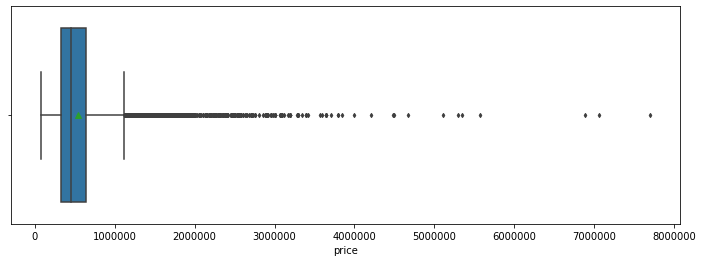

In [190]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

From the figure below we can see most of the housing price ranges in the number between 0-1 millions but there're few outliers.

### Check Outliers

In [191]:
indexNames = housing_df[(housing_df['price'] >= 7500000)].index
 
housing_df.drop(indexNames, inplace=True)

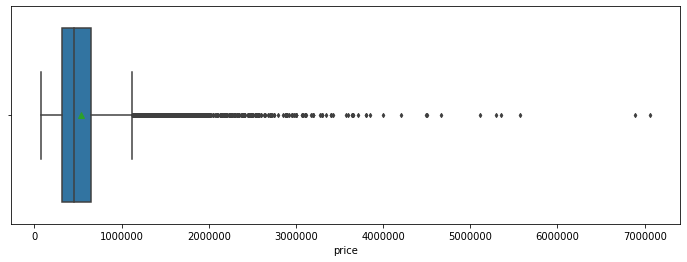

In [192]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

## Question 1: Is the size of your house more valuable in higher priced zipcodes

- Create a new variable called 'meanzip' which takes the average of all the house prices for each zipcode
- Look at the value of having a relatively bigger house changes in importance between low prices vs high priced zipcodes

### Create a zipcode variable

In [15]:
zips = housing_df['zipcode'].value_counts().index
mean_of_zips = {}
for z in zips:
    ziphouses = housing_df[housing_df['zipcode'] == z]['price']
    mean_of_zips[z] = ziphouses.mean()

In [60]:
housing_df['meanzip'] = housing_df['zipcode'].map(lambda x: (mean_of_zips[x]) )

In [61]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~meanzip'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

The R^2 value for price~sqft_living is 0.488
The R^2 value for price~grade is 0.455
The R^2 value for price~meanzip is 0.415


From this we can see that **Sqft_living**, **Grade** and **Meanzip** explain the highest percentage of the variation in Price. 
From this information we can test if sqft_living changes when you move through house price zipocde.

We will next test if sqft_living and grade explains the price in low priced zipocdes and high priced zipcodes.

### Sqft_living and Grade in Low Priced Zipcodes

In [62]:
bottom_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],10)
cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ten_percent_zipcodes]
print("There are", len(cheap_houses['meanzip']),
      "houses are from a zipcode with an average price lower than", round(bottom_ten_percent_zipcodes,3), "(log).")

f = 'price~sqft_living'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

There are 1926 houses are from a zipcode with an average price lower than 296187.98 (log).
The R^2 value for price~sqft_living is 0.631
The R^2 value for price~grade is 0.471


### Sqft_living and Grade in High Priced Zipcodes

In [63]:
top_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
expensive_houses = housing_df.loc[housing_df['meanzip'] > top_ten_percent_zipcodes]
print("There are", len(expensive_houses['meanzip']),
      "houses are from a zipcode with an average price higher than", round(top_ten_percent_zipcodes,3), "(log).")

f = 'price~sqft_living'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

There are 2039 houses are from a zipcode with an average price higher than 810289.696 (log).
The R^2 value for price~sqft_living is 0.627
The R^2 value for price~grade is 0.491


In [64]:
bottom_ninety_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
all_cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ninety_percent_zipcodes]

**So it seems that houses in higher priced zipcodes are substantially affected by the size of the house.**
Now lets plot individual zipcodes on a scatter graph.

Zipcode: 98112


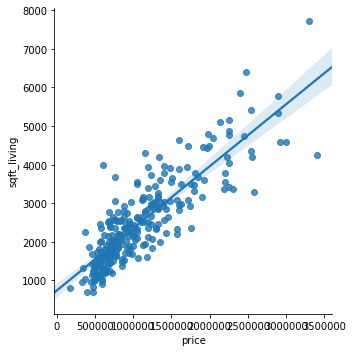

Zipcode: 98119


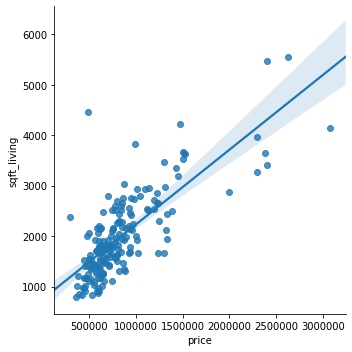

Zipcode: 98039


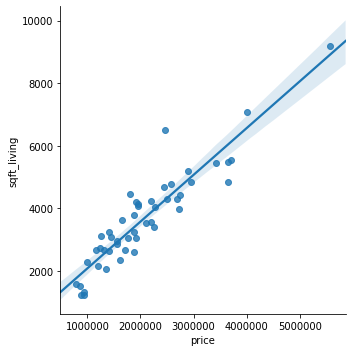

Zipcode: 98004


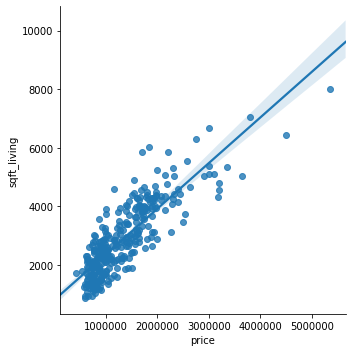

Zipcode: 98102


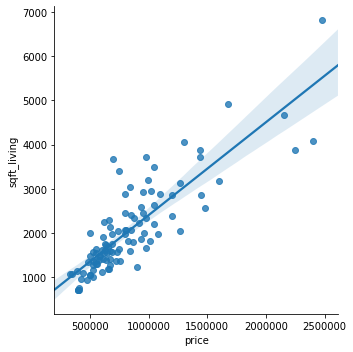

Zipcode: 98006


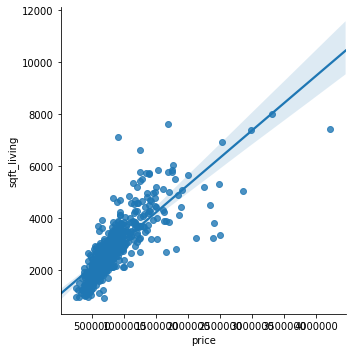

Zipcode: 98040


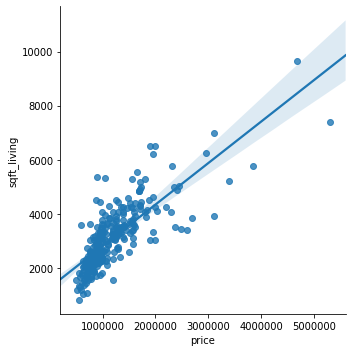

Zipcode: 98105


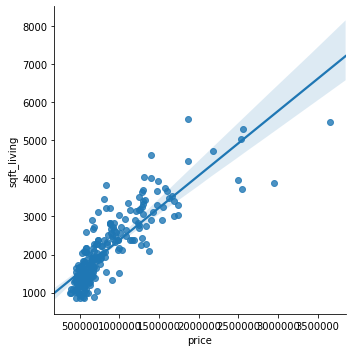

Zipcode: 98109


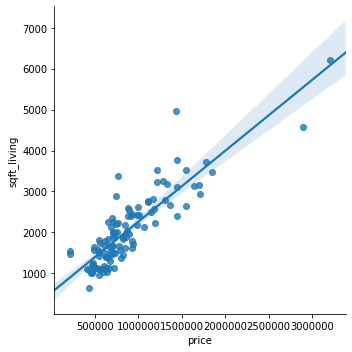

In [65]:
exp_zipcodes = list(set(expensive_houses['zipcode']))

numbers = list(range(0, len(exp_zipcodes)))
new_list = []
for num in numbers:
    zipc = expensive_houses.loc[expensive_houses['zipcode'] == exp_zipcodes[num] ]
    sns.lmplot(x="price", y="sqft_living", data=zipc)    
    plt.title(print("Zipcode:",exp_zipcodes[num]))
    plt.show(fig)

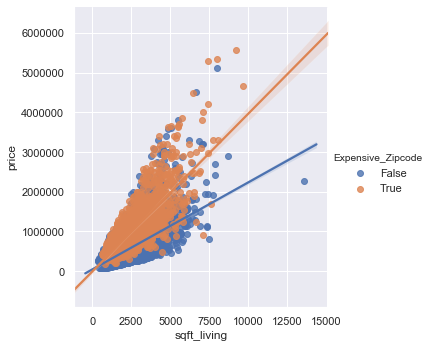

In [70]:
housing_df['Expensive_Zipcode'] = housing_df['meanzip'] > np.percentile(housing_df['meanzip'],90)
housing_df

housing_df['Ex'] = housing_df['meanzip'] > top_ten_percent_zipcodes
import seaborn as sns; sns.set(color_codes=True)
sns.lmplot(x="sqft_living", y="price", hue= 'Expensive_Zipcode', data=housing_df)

### Q1 summary
- We started our analysis by creating a new variable called 'Meanzip'. This variable found the average house price of each zipcode. This helped understand if a certain zip code was a relatively low or high house priced area 
- We then carried out linear regression on all our variables against Price. We found that sqft_living (0.455), grade (0.496) and mean zip (0.529) all returned R^2 values above 0.4
- From here, We decided that it would be worth testing if R^2 value for sqft_living was higher when We looked at just high priced housing zip codes.
- We looked at all houses where they were in a zip code that had an average house price above the 90th percentile. From a dataset 1708 houses the R^2 value was 0.686
<br>

**Suggestions:**
- Test sqft_living against price in the high priced housing areas on a new data set.
- With extra data it would be interesting to find the cost of renovations/extensions on a house versus the potential increase in price

## Question 2: How do geographic features affect housing price?

### Data visualization

The graph below shows that the geographic location and natural features are important denominators of price in King County. The price for the square footage of constructed area (sqft_living) increases according to the closeness of the water bodies. Moreover, the presence of a waterfront, particularly increases the price of the square footage.

<function matplotlib.pyplot.show(*args, **kw)>

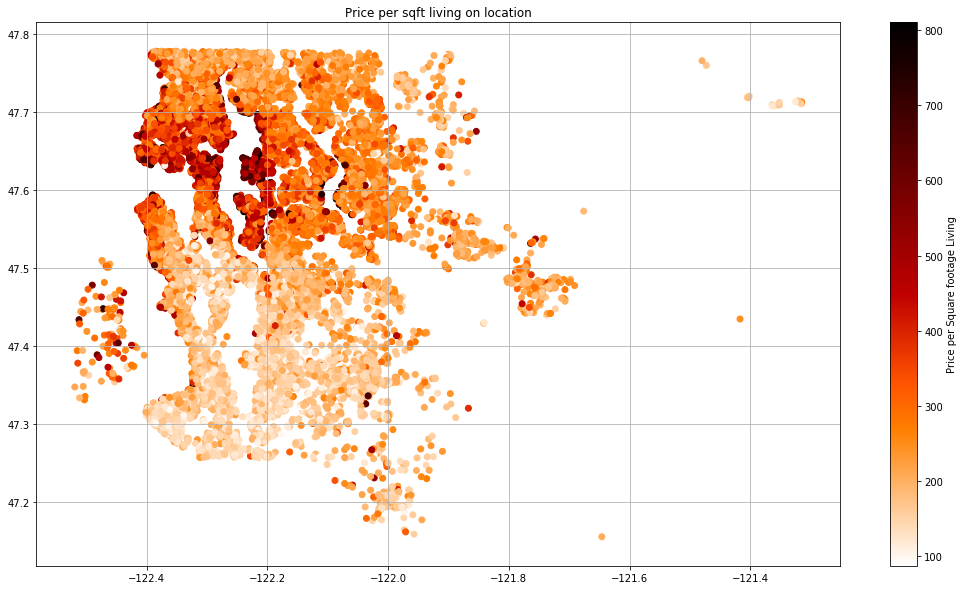

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(housing_df['long'], housing_df['lat'], c=housing_df['price']/housing_df['sqft_living'], cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Price per Square footage Living')
plt.grid(which='both')
plt.title('Price per sqft living on location')
plt.show

### Multi linear regression model

Multiple regression analysis investigating the effects of square footage of living area (sqft_living); waterfront, latitude and longitude on price, for properties in the King County

In [16]:
X = housing_df[['sqft_living', 'lat', 'long', 'waterfront']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     8546.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:57:50   Log-Likelihood:            -2.9659e+05
No. Observations:               21594   AIC:                         5.932e+05
Df Residuals:                   21589   BIC:                         5.932e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.429e+07    1.4e+06    -45.918      0.000    -6.7e+07   -6.15e+07
sqft_living   271.4340      1.735    156.444      0.000     268.033     274.835
lat          6.877e+05   1.11e+04     61.869      0.000    6.66e+05     7.1e+05
long        -2.582e+05   1.13e+04    -22.869      0.000    -2.8e+05   -2.36e+05
waterfront   8.408e+05   1.87e+04     44.853      0.000    8.04e+05    8.78e+05
==============================================================================
Omnibus:                    12780.354   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           298229.116
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      20.557   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q2 Summary

We started our analysis  visualizing the data in a scatter plot heat map, in order to observe the locations in which square footage of living (or constructed area) are higher for in King County.  This helped us understand what were the areas in which one must pay premium prices per living square footage.                                                                                                                                                                       Moreover, it was possible to observe that the properties with highest values were situated near a body of water. 
We then carried out multiple regression analysis, the variables we used were: price as the dependent variable, which returned R^2 (0.647). All independent variables had a significant effect on pricing. With Square footage of living area being the strongest predictive variable.  
<br>
**Suggestions**
<br>
Compare neighborhoods with proximity to water bodies, in order to find out where one can get the best value for money, and keeping premium features such as waterfront. 

## Question 3: As a property adviser, how does internal property features affect housing price? 

In this report, we will consider sqft_living, sqft_lot, sqft_above, sqft_basement as continuous variables, bathrooms, bedrooms, floors, grade as categorical variables.

### Multicollinearity of Features

Plot matrix to check multicollinearity of features

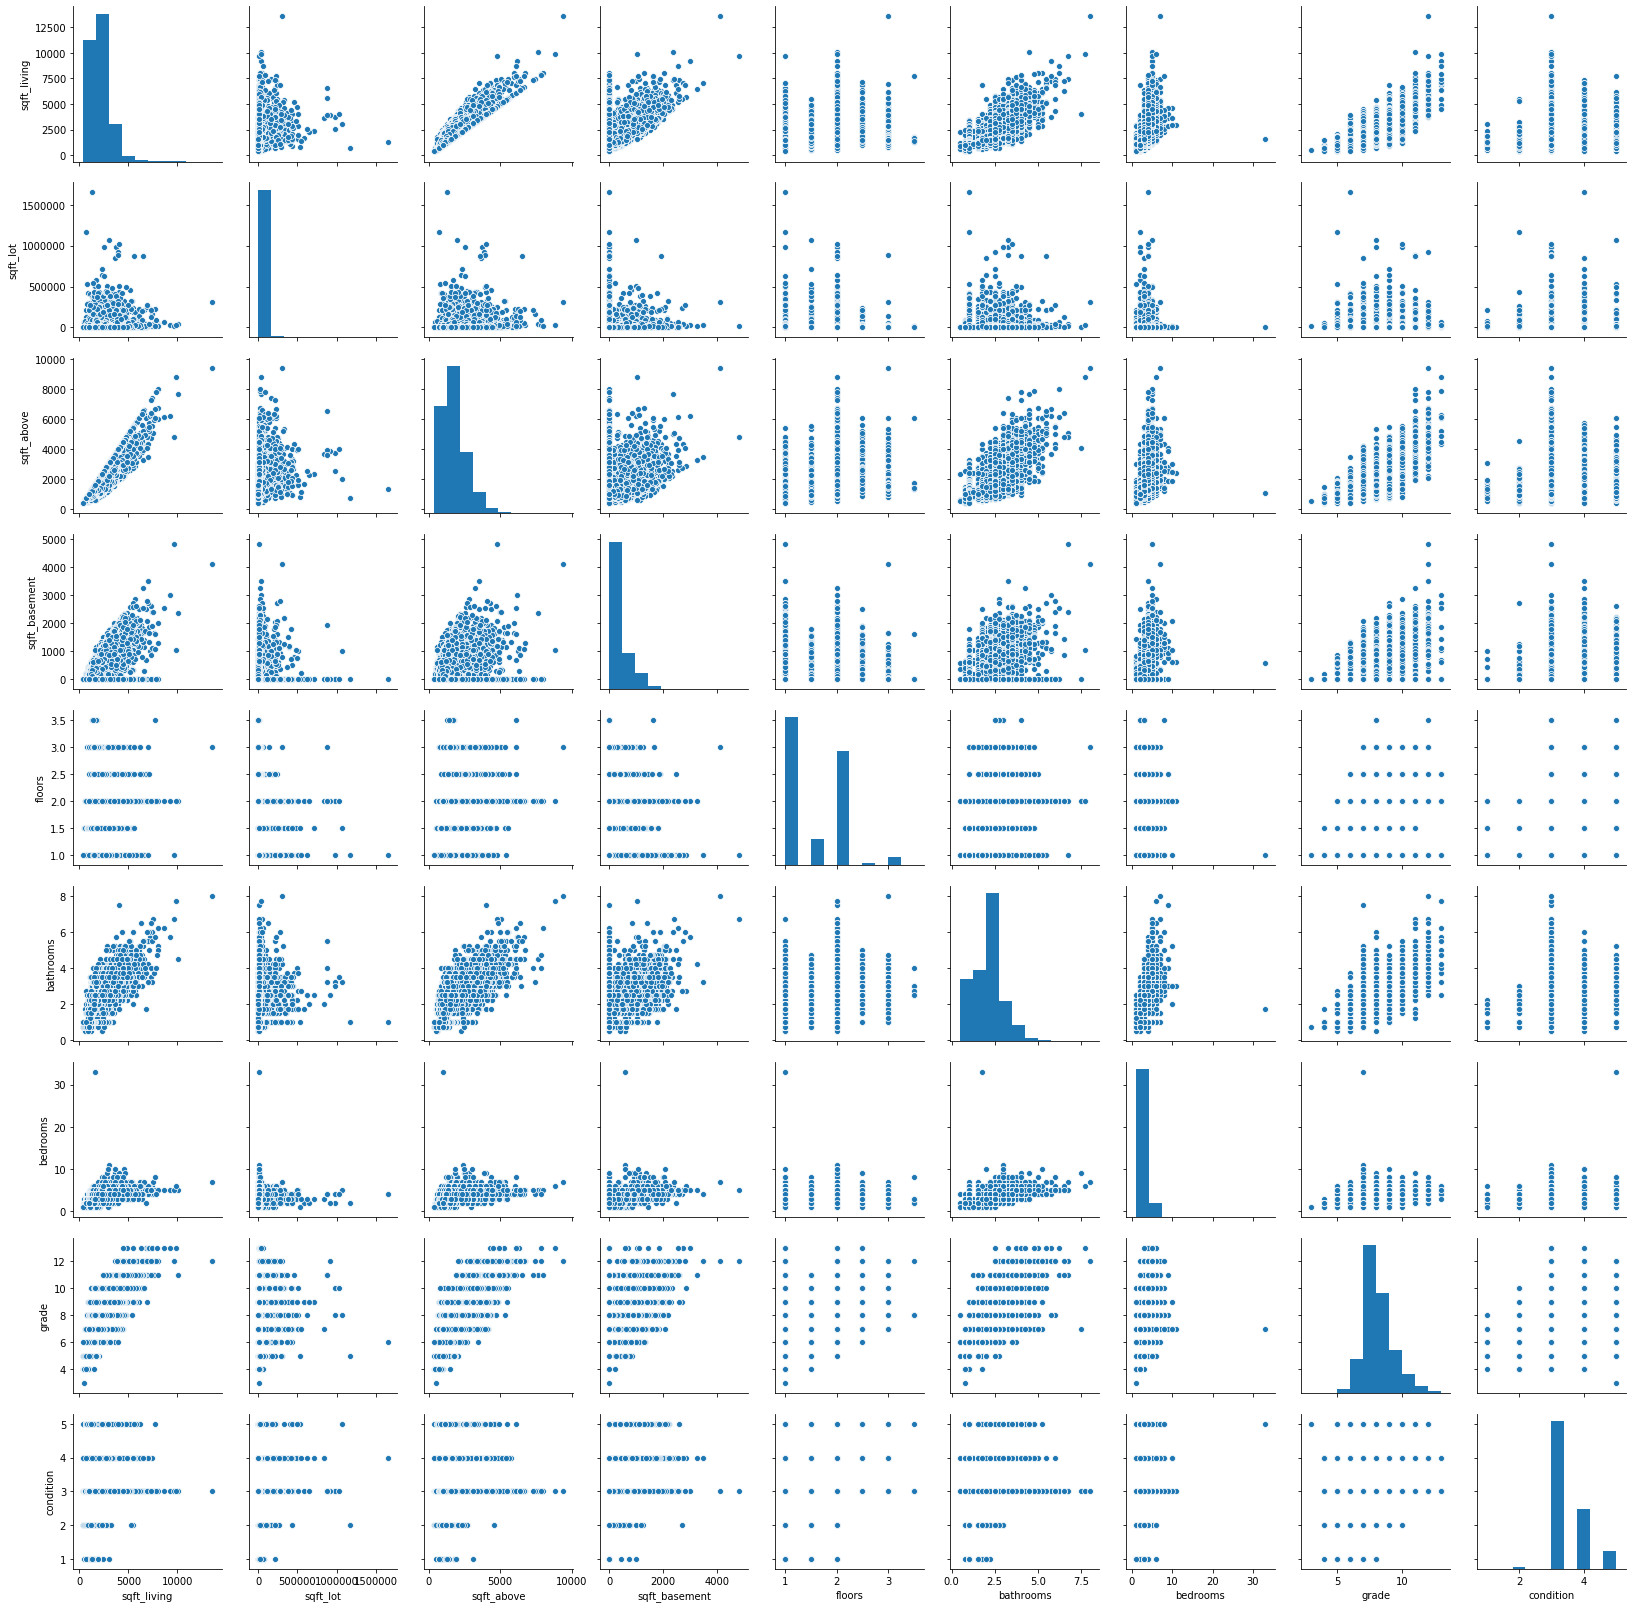

In [193]:
x2_cols=['sqft_living', 
         'sqft_lot', 
         'sqft_above', 
         'sqft_basement', 
         'floors', 
         'bathrooms', 
         'bedrooms', 
         'grade', 
         'condition']
sns.pairplot(housing_df[x2_cols])

In [194]:
housing_df[x2_cols].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,1.000000,0.173776,0.876082,0.426695,0.354012,0.754995,0.578475,0.762941,-0.060066
sqft_lot,0.173776,1.000000,0.184312,0.014948,-0.004841,0.088386,0.032438,0.114722,-0.008842
sqft_above,0.876082,0.184312,1.000000,-0.054080,0.524139,0.685760,0.479145,0.755883,-0.159499
sqft_basement,0.426695,0.014948,-0.054080,1.000000,-0.242809,0.276624,0.296693,0.164592,0.168386
floors,0.354012,-0.004841,0.524139,-0.242809,1.000000,0.502644,0.177747,0.458658,-0.264180
bathrooms,0.754995,0.088386,0.685760,0.276624,0.502644,1.000000,0.514296,0.665446,-0.126975
bedrooms,0.578475,0.032438,0.479145,0.296693,0.177747,0.514296,1.000000,0.356202,0.026382
grade,0.762941,0.114722,0.755883,0.164592,0.458658,0.665446,0.356202,1.000000,-0.147161
condition,-0.060066,-0.008842,-0.159499,0.168386,-0.264180,-0.126975,0.026382,-0.147161,1.000000


### Correlation check

In [195]:
abs(housing_df[x2_cols].corr()) > 0.76

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,True,False,True,False,False,False,False,True,False
sqft_lot,False,True,False,False,False,False,False,False,False
sqft_above,True,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
bathrooms,False,False,False,False,False,True,False,False,False
bedrooms,False,False,False,False,False,False,True,False,False
grade,True,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


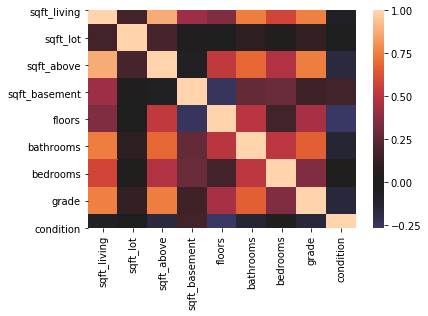

In [196]:
sns.heatmap(housing_df[x2_cols].corr(), center=0);

In [197]:
housing_df = housing_df.drop('sqft_living', axis=1)

### Continuous Variables for internal features

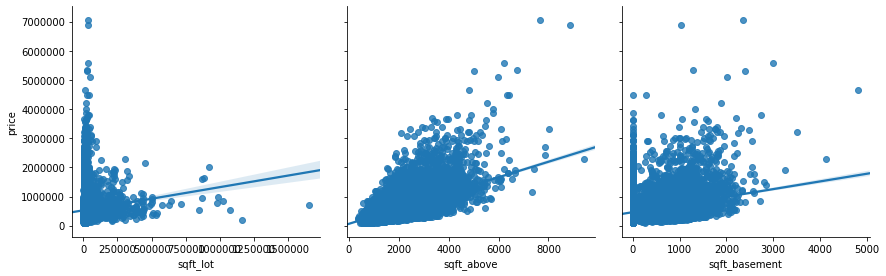

In [198]:
internal_factors = ['sqft_lot','sqft_above','sqft_basement']
sns.pairplot(data=housing_df,
                  y_vars=['price'],
                  x_vars=internal_factors,
                  kind = 'reg',
                  height=4)

### Feature normalization

In [199]:
x_cols = ['sqft_lot','sqft_above','sqft_basement','price']

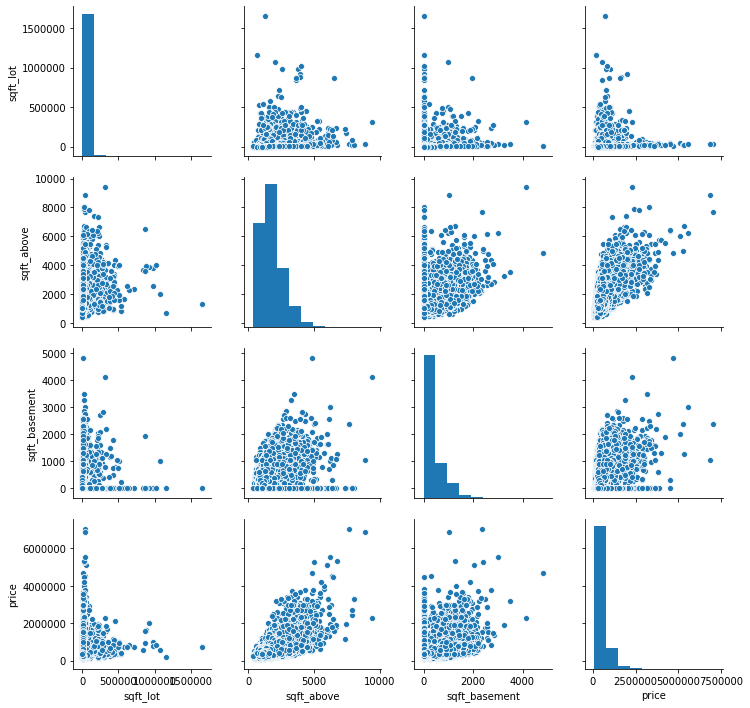

In [200]:
sns.pairplot(housing_df[x_cols])

### Log transformation

From the chart above we can see sqft_basement has many zero values, therefore we wont have log transformation on sqft_basement.

In [201]:
non_normal = ['sqft_lot', 'sqft_above', 'price']
for variable in non_normal:
    housing_df[variable] = housing_df[variable].map(lambda x: np.log(x))


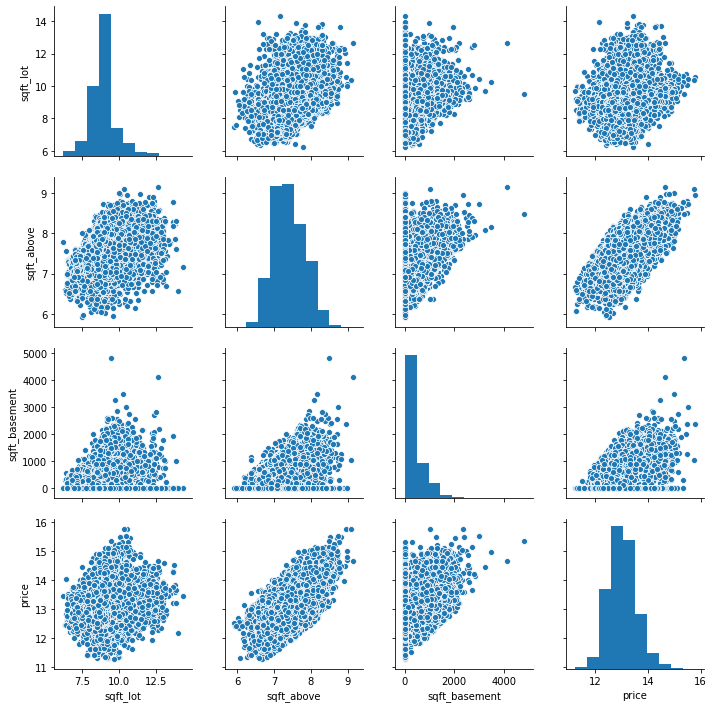

In [202]:
sns.pairplot(housing_df[x_cols])

from the the figures showing above, we can see the sqft_living and sqft_above look like having a stronger impact on the housing price, and we will analyse this when we test for the linear regression model.

### Categorical Variables for internal features

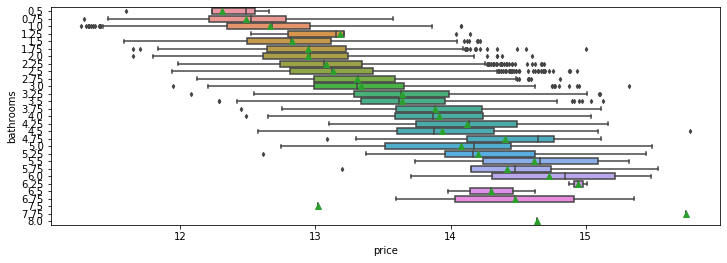

In [203]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bathrooms', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

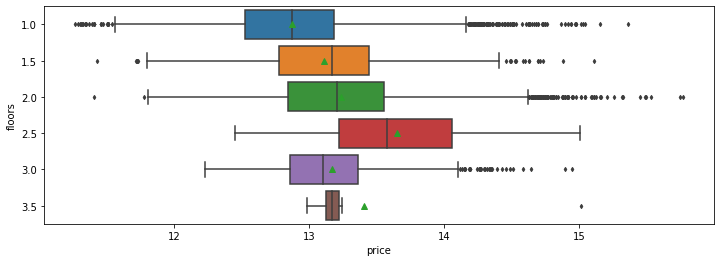

In [204]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

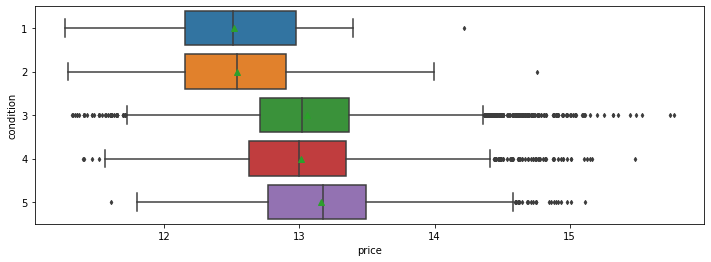

In [205]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

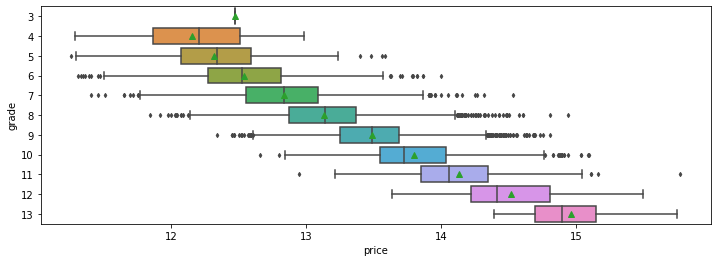

In [206]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', 
            x = 'price', 
            data = housing_df,width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

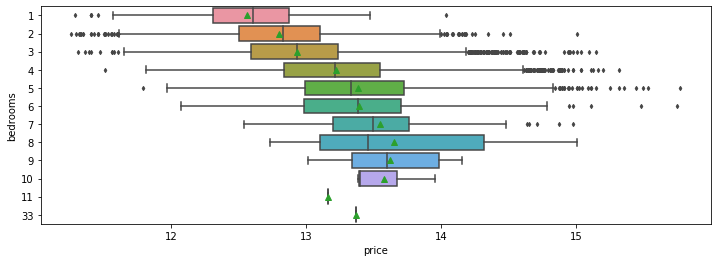

In [207]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bedrooms', 
            x = 'price', 
            data = housing_df,width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

From the figures above, it shows grade has a strong impact with housing price.

### Creat dummy variables for internal categorical variables

We will use one hot encoding to create dummy varaibles for our internal categorical variables

In [208]:
floor_dummies = pd.get_dummies(housing_df['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(housing_df['bathrooms'], prefix='bath', drop_first=True)
condition_dummies = pd.get_dummies(housing_df['condition'], prefix='con', drop_first=True)
grade_dummies = pd.get_dummies(housing_df['grade'], prefix='grade', drop_first=True)
bedrooms_dummies = pd.get_dummies(housing_df['bedrooms'], prefix='bed', drop_first=True)

housing_df = housing_df.drop(['floors','bathrooms','condition','bedrooms','grade'], axis=1)

housing_df = pd.concat([housing_df, 
                        floor_dummies, 
                        bathrooms_dummies, 
                        condition_dummies, 
                        grade_dummies,
                        bedrooms_dummies
                        ], axis=1)
housing_df.head()

,date,price,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,10/13/2014,12.309982,8.639411,0.0,0.0,7.073270,0.0,1955,0.0,98178,...,1,0,0,0,0,0,0,0,0,0
1,12/9/2014,13.195614,8.887653,0.0,0.0,7.682482,400.0,1951,1991.0,98125,...,1,0,0,0,0,0,0,0,0,0
2,2/25/2015,12.100712,9.210340,0.0,0.0,6.646391,0.0,1933,0.0,98028,...,0,0,0,0,0,0,0,0,0,0
3,12/9/2014,13.311329,8.517193,0.0,0.0,6.956545,910.0,1965,0.0,98136,...,0,1,0,0,0,0,0,0,0,0
4,2/18/2015,13.142166,8.997147,0.0,0.0,7.426549,0.0,1987,0.0,98074,...,1,0,0,0,0,0,0,0,0,0


In [209]:
housing_df.dtypes

date           object
price         float64
sqft_lot      float64
waterfront    float64
view          float64
               ...   
bed_8           uint8
bed_9           uint8
bed_10          uint8
bed_11          uint8
bed_33          uint8
Length: 72, dtype: object

We spotted there's an extreme case in bedroom which is 33, so we look into it

In [210]:
housing_df[housing_df['bed_33'] == 1]

,date,price,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
15856,6/25/2014,13.369223,8.699515,0.0,0.0,6.946976,580.0,1947,0.0,98103,...,0,0,0,0,0,0,0,0,0,1


After looking into the data, we decided to delete this row also remove bed_33 column.

In [211]:
index_bed_33 = housing_df[(housing_df['bed_33'] == 1)].index
 
housing_df.drop(index_bed_33, inplace=True)

In [212]:
del housing_df['bed_33']

Double check if it's deleted properly

In [213]:
housing_df.dtypes

date           object
price         float64
sqft_lot      float64
waterfront    float64
view          float64
               ...   
bed_7           uint8
bed_8           uint8
bed_9           uint8
bed_10          uint8
bed_11          uint8
Length: 71, dtype: object

In [214]:
housing_df.reset_index(drop=True, inplace=True)

In [215]:
housing_df.keys()

Index(['date', 'price', 'sqft_lot', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'bath_0.75', 'bath_1.0', 'bath_1.25',
       'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5',
       'bath_2.75', 'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75',
       'bath_4.0', 'bath_4.25', 'bath_4.5', 'bath_4.75', 'bath_5.0',
       'bath_5.25', 'bath_5.5', 'bath_5.75', 'bath_6.0', 'bath_6.25',
       'bath_6.5', 'bath_6.75', 'bath_7.5', 'bath_7.75', 'bath_8.0', 'con_2',
       'con_3', 'con_4', 'con_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9',
       'bed_10', 'bed_11'],
      dtype='object')

## Single Linear Regression

R-Squared: 0.34303609678041513
Intercept     7.710299
sqft_above    0.721799
dtype: float64


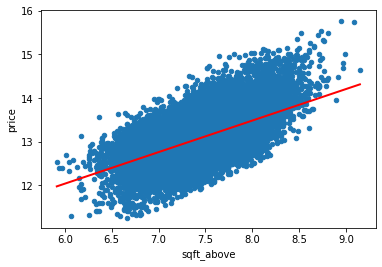

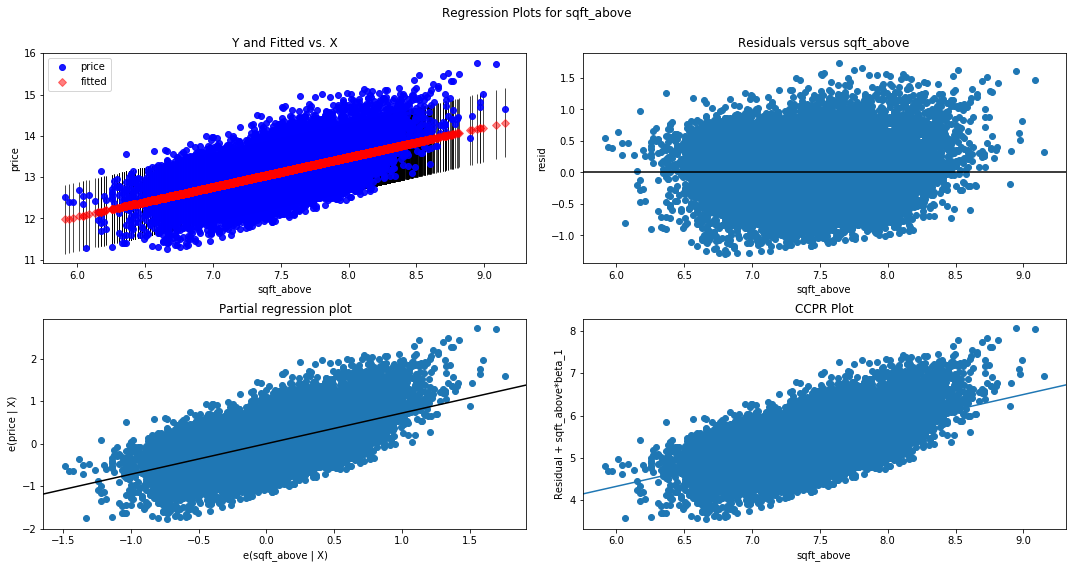

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


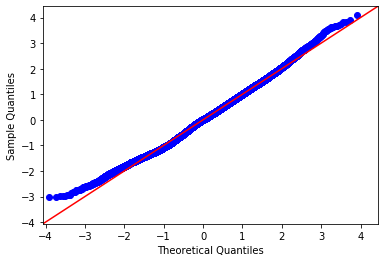

In [216]:
f = 'price~sqft_above'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [housing_df.sqft_above.min(), housing_df.sqft_above.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [217]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:21:01   Log-Likelihood:                -12241.
No. Observations:               21595   AIC:                         2.449e+04
Df Residuals:                   21593   BIC:                         2.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7103      0.050    153.124      0.000       7.612       7.809
sqft_above     0.7218      0.007    106.183      0.000       0.708       0.735
==============================================================================
Omnibus:                      137.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.301
Skew:                           0.186   Prob(JB):                     9.30e-31
Kurtosis:                       2.879   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.019052258247874265
Intercept    12.324212
sqft_lot      0.080520
dtype: float64


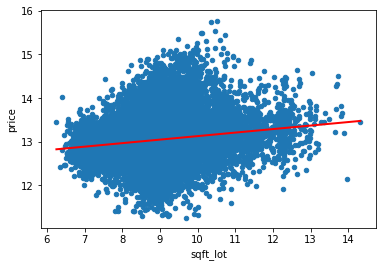

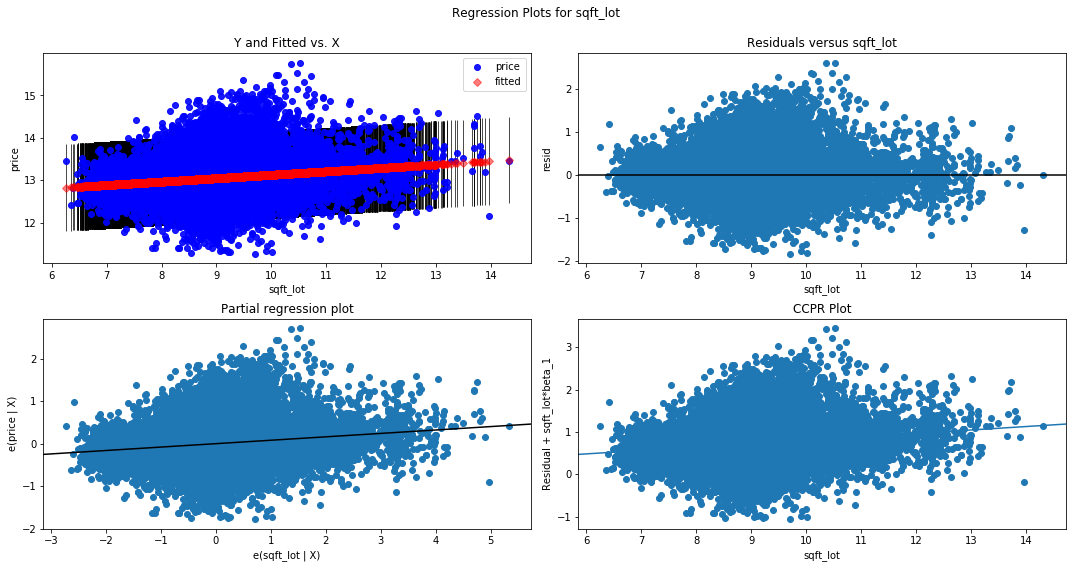

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


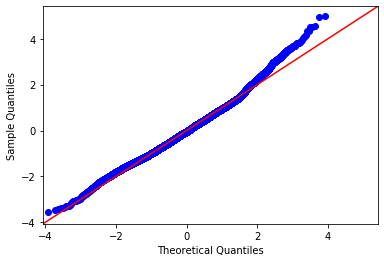

In [218]:
f = 'price~sqft_lot'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot': [housing_df.sqft_lot.min(), housing_df.sqft_lot.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [219]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     419.4
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.50e-92
Time:                        10:21:04   Log-Likelihood:                -16569.
No. Observations:               21595   AIC:                         3.314e+04
Df Residuals:                   21593   BIC:                         3.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3242      0.036    346.928      0.000      12.255      12.394
sqft_lot       0.0805      0.004     20.479      0.000       0.073       0.088
==============================================================================
Omnibus:                      598.658   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.189
Skew:                           0.355   Prob(JB):                    5.55e-158
Kurtosis:                       3.547   Cond. No.                         91.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.0972808664542294
Intercept        12.941377
sqft_basement     0.000374
dtype: float64


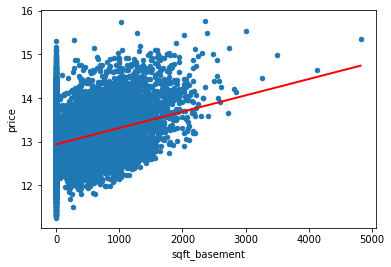

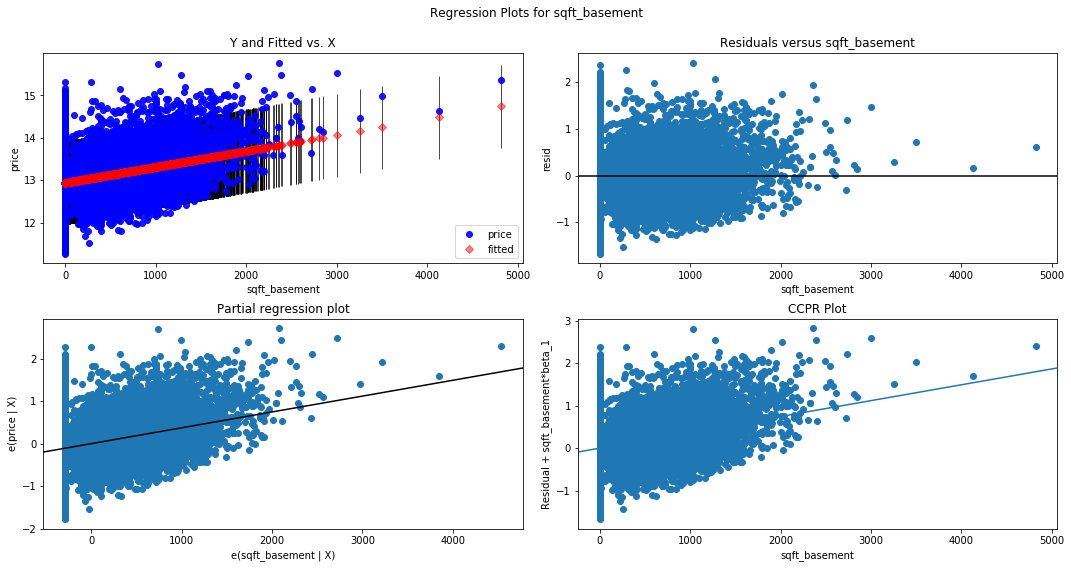

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


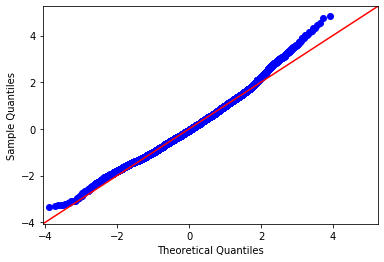

In [220]:
f = 'price~sqft_basement'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_basement': [housing_df.sqft_basement.min(), housing_df.sqft_basement.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_basement', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [221]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2327.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:21:06   Log-Likelihood:                -15672.
No. Observations:               21595   AIC:                         3.135e+04
Df Residuals:                   21593   BIC:                         3.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9414      0.004   3189.061      0.000      12.933      12.949
sqft_basement     0.0004   7.75e-06     48.239      0.000       0.000       0.000
==============================================================================
Omnibus:                      599.043   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.273
Skew:                           0.376   Prob(JB):                    3.50e-150
Kurtosis:                       3.446   Cond. No.                         625.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi Linear Regression

It seems like sqft_living factor has the strongest impact over housing price, so we will try some different conbinations with sqft_living and other factors

In [224]:
X = housing_df[['sqft_lot', 'sqft_above', 'sqft_basement', 'floors_1.5', 
                'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
                'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
                'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
                'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
                'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
                'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
                'bath_7.75', 'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'grade_4',
                'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
                'grade_11', 'grade_12', 'grade_13', 'bed_2', 'bed_3', 'bed_4', 'bed_5',
                'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     538.0
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:24:53   Log-Likelihood:                -6888.1
No. Observations:               21595   AIC:                         1.390e+04
Df Residuals:                   21534   BIC:                         1.438e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8540      0.387     25.493      0.000       9.096      10.612
sqft_lot         -0.0401      0.003    -12.558      0.000      -0.046      -0.034
sqft_above        0.3981      0.012     32.992      0.000       0.374       0.422
sqft_basement     0.0003   6.91e-06     42.045      0.000       0.000       0.000
floors_1.5        0.1735      0.009     19.815      0.000       0.156       0.191
floors_2.0       -0.0112      0.008     -1.399      0.162      -0.027       0.004
floors_2.5        0.1317      0.028      4.765      0.000       0.078       0.186
floors_3.0        0.0587      0.016      3.611      0.000       0.027       0.091
floors_3.5        0.0543      0.127      0.427      0.670      -0.195       0.304
bath_0.75         0.3165      0.172      1.841      0.066      -0.020       0.653
bath_1.0          0.2502      0.167      1.499      0.134      -0.077       0.577
bath_1.25         0.2803      0.201      1.398      0.162      -0.113       0.673
bath_1.5          0.2099      0.167      1.256      0.209      -0.118       0.538
bath_1.75         0.2598      0.167      1.555      0.120      -0.068       0.587
bath_2.0          0.2492      0.167      1.491      0.136      -0.078       0.577
bath_2.25         0.2278      0.167      1.362      0.173      -0.100       0.555
bath_2.5          0.1814      0.167      1.085      0.278      -0.146       0.509
bath_2.75         0.2461      0.167      1.471      0.141      -0.082       0.574
bath_3.0          0.2600      0.168      1.551      0.121      -0.068       0.588
bath_3.25         0.3068      0.168      1.829      0.067      -0.022       0.636
bath_3.5          0.2665      0.168      1.589      0.112      -0.062       0.595
bath_3.75         0.3988      0.169      2.354      0.019       0.067       0.731
bath_4.0          0.3364      0.170      1.981      0.048       0.003       0.669
bath_4.25         0.3627      0.172      2.113      0.035       0.026       0.699
bath_4.5          0.3289      0.171      1.925      0.054      -0.006       0.664
bath_4.75         0.4614      0.182      2.538      0.011       0.105       0.818
bath_5.0          0.3356      0.183      1.835      0.067      -0.023       0.694
bath_5.25         0.4369      0.192      2.273      0.023       0.060       0.814
bath_5.5          0.5041      0.200      2.525      0.012       0.113       0.895
bath_5.75         0.2641      0.239      1.104      0.270      -0.205       0.733
bath_6.0          0.4499      0.219      2.055      0.040       0.021       0.879
bath_6.25         0.5481      0.295      1.861      0.063      -0.029       1.125
bath_6.5          0.0825      0.290      0.284      0.776      -0.486       0.651
bath_6.75        -0.4343      0.292     -1.485      0.137      -1.007       0.139
bath_7.5         -0.0211      0.402     -0.053   

### Adjust the model

Remove few factors that have p value greater than 0.05 and re-fit the model

In [267]:
X = housing_df[['sqft_lot', 'sqft_above', 'sqft_basement', 'floors_1.5', 
                'floors_2.5', 'floors_3.0', 'bath_1.0', 'bath_1.75', 'bath_2.0',
                'bath_2.5', 'bath_3.0', 'bath_3.25',
                'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
                'bath_4.75', 'bath_5.25', 'bath_5.5', 'bath_6.75', 'bath_7.75', 
                'bath_8.0', 'con_2', 'con_4', 'con_5', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
                'grade_11', 'grade_12', 'grade_13', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     845.1
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:43:07   Log-Likelihood:                -6927.4
No. Observations:               21595   AIC:                         1.393e+04
Df Residuals:                   21556   BIC:                         1.424e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0353      0.074    136.427      0.000       9.891      10.179
sqft_lot         -0.0399      0.003    -13.403      0.000      -0.046      -0.034
sqft_above        0.4022      0.011     36.410      0.000       0.381       0.424
sqft_basement     0.0003   6.47e-06     46.080      0.000       0.000       0.000
floors_1.5        0.1750      0.008     20.957      0.000       0.159       0.191
floors_2.5        0.1394      0.027      5.195      0.000       0.087       0.192
floors_3.0        0.0676      0.015      4.577      0.000       0.039       0.097
bath_1.0          0.0289      0.009      3.260      0.001       0.012       0.046
bath_1.75         0.0361      0.008      4.538      0.000       0.021       0.052
bath_2.0          0.0242      0.009      2.646      0.008       0.006       0.042
bath_2.5         -0.0509      0.007     -7.232      0.000      -0.065      -0.037
bath_3.0          0.0267      0.013      1.993      0.046       0.000       0.053
bath_3.25         0.0699      0.015      4.549      0.000       0.040       0.100
bath_3.5          0.0282      0.014      1.960      0.050    -2.9e-06       0.056
bath_3.75         0.1602      0.028      5.697      0.000       0.105       0.215
bath_4.0          0.0954      0.030      3.157      0.002       0.036       0.155
bath_4.25         0.1190      0.039      3.036      0.002       0.042       0.196
bath_4.5          0.0879      0.035      2.498      0.013       0.019       0.157
bath_4.75         0.2157      0.071      3.027      0.002       0.076       0.355
bath_5.25         0.1834      0.094      1.956      0.050      -0.000       0.367
bath_5.5          0.2524      0.109      2.320      0.020       0.039       0.466
bath_6.75        -0.7019      0.240     -2.928      0.003      -1.172      -0.232
bath_7.75         0.9050      0.350      2.586      0.010       0.219       1.591
bath_8.0         -1.0238      0.342     -2.992      0.003      -1.694      -0.353
con_2            -0.1073      0.026     -4.126      0.000      -0.158      -0.056
con_4             0.0758      0.006     13.641      0.000       0.065       0.087
con_5             0.1889      0.009     21.265      0.000       0.171       0.206
grade_7           0.2207      0.009     24.986      0.000       0.203       0.238
grade_8           0.4362      0.011     41.215      0.000       0.415       0.457
grade_9           0.6971      0.013     53.651      0.000       0.672       0.723
grade_10          0.9015      0.016     55.928      0.000       0.870       0.933
grade_11          1.0848      0.023     48.125      0.000       1.041       1.129
grade_12          1.3368      0.040     33.696      0.000       1.259       1.415
grade_13          1.4260      0.105     13.619      0.000       1.221       1.631
bed_3            -0.1313      0.008    -16.697   

### Q3 summary

In summary, grade and sqft_above have stronger impacts on housing price, and quite few variables has strong multicollinearity with other variables. Hence it will be helpful to reduce the factors during the initial investigation process.
<br>
We suggest to remove sqft_basement, sqft_living and bedrooms, these are the features that have high collinearity with other features.
In general, our multi linear regression model indicates that internal features have a relative coefficient(0.598) value with housing price, which means as a property advisor we should believe internal features are important.